In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten, Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Initialize Variables**

In [ ]:
tumorType = ['no_tumor','pituitary_tumor','meningioma_tumor','glioma_tumor']
labelValues = []
imagesData = []
folderPath =  '/content/drive/MyDrive/MachineLearning_FinalProj/BrainTumor_Data/'

**Loading the dataset (Converting it from Images to pixels)**

In [ ]:
for Ttype in range(len(tumorType)):
  foldername = os.path.join(folderPath, tumorType[Ttype])
  for image in os.listdir(foldername):
     imgValue = cv2.imread(os.path.join(foldername, image))
     imgValue = cv2.resize(imgValue,(200,200))
     imgValue = imgValue.reshape(200,200,3)
     imagesData.append(imgValue)
     labelValues.append(Ttype)

arrayImagesdata = np.asarray(imagesData)
arrayLabelvalues = np.asarray(labelValues)

**Splitting the data into**

1.   60 % Training
2.   25 % Test
3.   15 % Validation







In [ ]:
X_train,X_test,y_train,y_test=train_test_split(arrayImagesdata, arrayLabelvalues,test_size=0.25, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,shuffle=True,random_state=42) # 0.2 x 0.7 = 0.15

**Normalizing the training and testing data (from 0-255 pixels to 0-1)**

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

**Hot Encoding the outputs**


In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_val = np_utils.to_categorical(y_val)

In [ ]:
print ("X_train data shape:")
print (X_train.shape)
print ("y_train label shape:")
print (y_train.shape)
print("\n")

print ("X_test data shape:")
print (X_test.shape)
print ("y_test label shape:")
print (y_test.shape)
print("\n")

print ("val_train label shape:")
print (X_val.shape)
print ("val_test label shape:")
print (y_val.shape)

X_train data shape:
(1958, 200, 200, 3)
y_train label shape:
(1958, 4)


X_test data shape:
(816, 200, 200, 3)
y_test label shape:
(816, 4)


val_train label shape:
(490, 200, 200, 3)
val_test label shape:
(490, 4)


**Creating a Convolutional neural network (CNN) model**

In [ ]:
 model = Sequential([
    Conv2D(16, (3, 3), padding="same",input_shape=(200,200,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Dropout(0.4),

    Conv2D(32, (3, 3), activation='relu',padding = 'same',strides=1),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu',padding = 'same',strides=1),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu',padding = 'same',strides=1),
    MaxPooling2D(pool_size=(2, 2)),

    Dropout(0.4),
    Flatten(),
    Dense(100, activation='relu'),

    Dropout(0.4),
    Dense(64, activation='relu'),

    Dense(4, activation='softmax')
 ])

    
 model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 100, 100, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 64)       

**Compiling the model**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Training the Model**

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
16/16 [==============================] - 5s 266ms/step - loss: 1.3297 - accuracy: 0.3887 - val_loss: 1.2804 - val_accuracy: 0.4865
Epoch 2/20
16/16 [==============================] - 3s 205ms/step - loss: 1.1527 - accuracy: 0.4883 - val_loss: 1.0800 - val_accuracy: 0.5833
Epoch 3/20
16/16 [==============================] - 3s 206ms/step - loss: 0.9993 - accuracy: 0.5700 - val_loss: 0.9662 - val_accuracy: 0.6324
Epoch 4/20
16/16 [==============================] - 3s 203ms/step - loss: 0.9227 - accuracy: 0.6098 - val_loss: 0.8414 - val_accuracy: 0.7034
Epoch 5/20
16/16 [==============================] - 3s 204ms/step - loss: 0.8108 - accuracy: 0.6568 - val_loss: 0.8033 - val_accuracy: 0.7071
Epoch 6/20
16/16 [==============================] - 3s 205ms/step - loss: 0.7512 - accuracy: 0.6767 - val_loss: 0.7585 - val_accuracy: 0.6654
Epoch 7/20
16/16 [==============================] - 3s 205ms/step - loss: 0.7156 - accuracy: 0.6890 - val_loss: 0.7030 - val_accuracy: 0.7169
Epoch 

In [ ]:
valLoss, testAccuracy = model.evaluate(X_test, y_test,batch_size=32)
print('Test loss:', valLoss)
print('Test accuracy:', testAccuracy)

26/26 [==============================] - 1s 28ms/step - loss: 0.4054 - accuracy: 0.8725
Test loss: 0.4054100215435028
Test accuracy: 0.8725489974021912


**Visual representation of the model's accuracy**

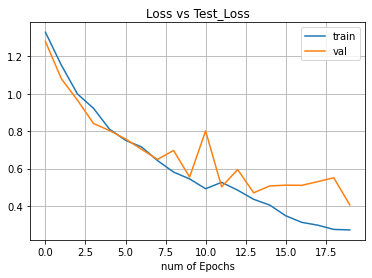

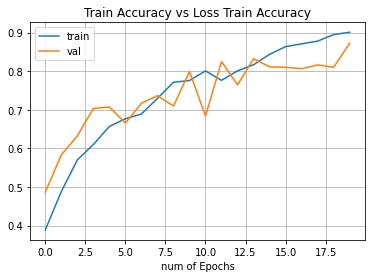

In [ ]:
plt.plot(range(20),history.history['loss'])
plt.plot(range(20),history.history['val_loss'])
plt.xlabel('num of Epochs')
plt.title('Loss vs Test_Loss')
plt.legend(['train','val'])
plt.grid(True)
plt.show()

print("\n")

plt.plot(range(20),history.history['accuracy'])
plt.plot(range(20),history.history['val_accuracy'])
plt.xlabel('num of Epochs')
plt.title('Train Accuracy vs Loss Train Accuracy')
plt.grid(True)
plt.legend(['train','val'],loc = "upper left")
plt.show()


**Testing the Model**
(Compare a randomly selected image with the actual result)


Prediction Matrix: [3.5266747e-04 4.0271343e-04 1.2981333e-02 9.8626328e-01]
Predicted tumor type:  glioma_tumor
Actual Tumor Type: glioma_tumor


***** MATCHED :) *****




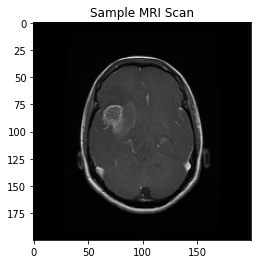

In [ ]:
randomNumber = random.randint(0, X_val.shape[0])
prediction = model.predict(X_val)
pT = tumorType[np.argmax(prediction[randomNumber], axis=0)]
aT = tumorType[np.where(y_val[randomNumber] == 1)[0][0]]

plt.imshow(X_val[randomNumber])
plt.title("Sample MRI Scan")

print("Prediction Matrix:", prediction[randomNumber])
print("Predicted tumor type: ", pT)
print("Actual Tumor Type:", aT)
print("\n")

if(pT == aT):
  print("***** MATCHED :) *****")
  print("\n")
else:
  print("***** NOT MATCHED :( *****")
  print("\n")




**Validate model using unseen data**

In [ ]:
pTArrray = []
aTArrray = []

for i in range(X_val.shape[0]):
  pTArrray.append(np.argmax(prediction[i], axis=0))
  aTArrray.append(np.where(y_val[i] == 1)[0][0])

accuracy = accuracy_score(aTArrray, pTArrray)
print("Accuracy score over validation data: ",accuracy)

Accuracy score over validation data:  0.8673469387755102


**Confusion Matrix**

In [ ]:
pTArrrayType= []
aTArrrayType = []

for i in range(X_val.shape[0]):
  pTArrrayType.append(tumorType[np.argmax(prediction[i], axis=0)])
  aTArrrayType.append(tumorType[np.where(y_val[i] == 1)[0][0]])

data = {'y_Actual':    aTArrrayType,
        'y_Predicted': pTArrrayType
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted         glioma_tumor  meningioma_tumor  no_tumor  pituitary_tumor
Actual                                                                     
glioma_tumor               129                12         9                3
meningioma_tumor            17               110         2               11
no_tumor                     2                 6        46                1
pituitary_tumor              1                 1         0              140
